# Data Stack Preparation

This notebook will help create a data stack (a multi-band raster) that contains multiple remote sensing data layers for identification and classification of agroforestry systems, such as palm oil plantations.

In [2]:
import asf_search as asf
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

import vegmapper
from vegmapper import pathurl

## User Inputs

In [3]:
# Site name
sitename = 'malaysia'

# Project directory (S3 path or local path)
# proj_dir = 's3://cropsamz/tests/malaysia'
proj_dir = pathurl.ProjDir(f'{sitename}')

# AOI file
aoifile = f'{sitename}/peninsular_malaysia.geojson'

# Start and end dates of interest
start_date = '2021-01-01'
end_date = '2021-02-01'

## Reference Tiles

### `prep_tiles`

To create a data stack, a reference tiling system is required to ensure all data layers are aligned to the same tiles on the same projection (UTM). A GeoJSON file containing the polygons of the tiles is generated by the function `vegmapper.prep_tiles`.

#### Usage

```
vegmapper.prep_tiles(aoi_name, aoi_boundary, tile_size)
```

|Arguments||Description||Required||Default|
|----||----||----||----|
|`aoi_name`||Used to name the output geoJSON. The generated tiles can be found at `aoi_name`_tiles.geojson.||Yes||None|
|`aoi_boundary`||shp/geoJSON file that contains the boundaries of our area of interest. geoJSON files for many subnational administrative boundaries can be found [here](https://data.humdata.org/dataset?ext_subnational=1&res_format=GeoJSON&vocab_Topics=administrative%20divisions&q=&sort=if(gt(last_modified%2Creview_date)%2Clast_modified%2Creview_date)%20desc&ext_page_size=25).||Yes||None|
|`tile_size`||The desired tile size, in meters.||Yes||None|

In [4]:
# Select desired tile size in meters
tile_size = 150000

Generate the UTM tiles by running the cell below:

In [5]:
aoi_tiles = vegmapper.prep_tiles(sitename, aoifile, tile_size, centered=True)

Tiles for malaysia is saved to: ../projects/malaysia/malaysia_tiles.geojson
16 out of 20 tiles intersecting malaysia


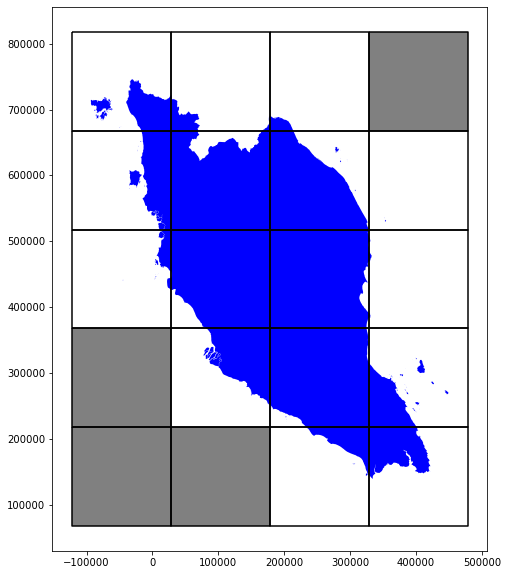

In [6]:
# Read in tiles and boundary
gdf_tiles = gpd.read_file(aoi_tiles)
gdf_aoi = gpd.read_file(aoifile).dissolve()
gdf_aoi_utm = gdf_aoi.to_crs(gdf_tiles.crs)

# Plot tiles
ax = gdf_tiles.boundary.plot(figsize=(10, 10), color='black')
# Plot boundary
gdf_aoi_utm.plot(ax=ax, color='blue')
# Plot tiles not intersecting AOI in gray
if (gdf_tiles['mask'] == 0).any():
    ax = gdf_tiles[gdf_tiles['mask'] == 0].plot(ax=ax, color='gray')

The tiles not intersecting AOI are shown in gray color. The final data stacks will not be generated for these tiles.